In [54]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
# Import a dataset
df = pd.read_excel('Marketing_Metrics.xlsx')
df.head()

,Customer_ID,Customer_Age,Total_Purchases,Average_Order_Value,Customer_Lifespan_Years,Marketing_Spend,Revenue_Generated,Churned,NPS_Score
0,CUST0001,56,8,NaN,6.5,3942.88,2791.76,0,7
1,CUST0002,46,11,323.51,9.9,6468.55,13159.60,0,10
2,CUST0003,32,19,NaN,2.3,4636.70,15047.88,0,5
3,CUST0004,60,17,277.17,5.7,5501.61,11875.69,0,4
4,CUST0005,25,8,63.34,8.9,9420.50,19262.36,0,8


In [57]:
# Are there any missing values in the dataset
df.isna().sum()

,0
Customer_ID,0
Customer_Age,0
Total_Purchases,0
Average_Order_Value,10
Customer_Lifespan_Years,0
Marketing_Spend,0
Revenue_Generated,0
Churned,0
NPS_Score,0


In [ ]:
# Check datatypes for variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer_ID              100 non-null    object 
 1   Customer_Age             100 non-null    int64  
 2   Total_Purchases          100 non-null    int64  
 3   Average_Order_Value      100 non-null    float64
 4   Customer_Lifespan_Years  100 non-null    float64
 5   Marketing_Spend          100 non-null    float64
 6   Revenue_Generated        100 non-null    float64
 7   Churned                  100 non-null    int64  
 8   NPS_Score                100 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 7.2+ KB


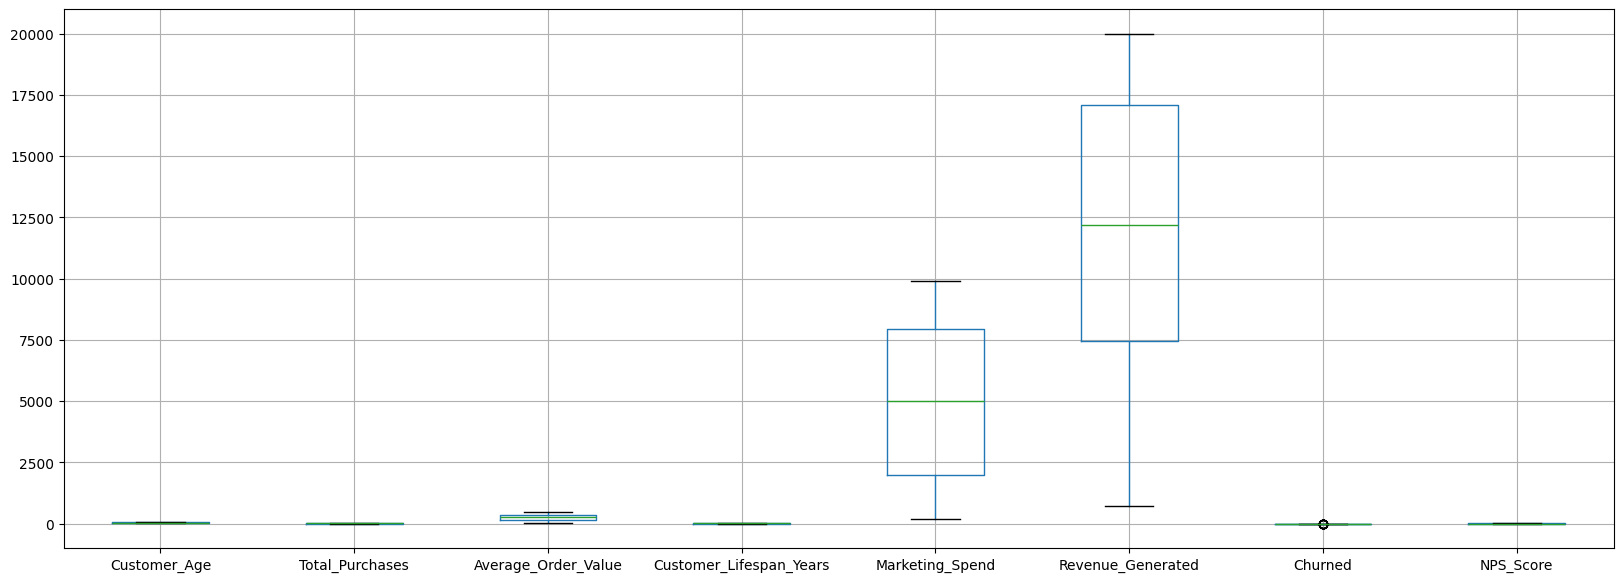

In [ ]:
# Check whether there are any outliers
fig = plt.figure(figsize =(20, 7))
df.boxplot()
plt.show()


In [ ]:
# Replace missing values with mean of average_order_value
df['Average_Order_Value'].fillna(df['Average_Order_Value'].mean())

,Average_Order_Value
0,263.891444
1,323.510000
2,263.891444
3,277.170000
4,63.340000
...,...
95,287.260000
96,263.891444
97,354.090000
98,293.630000


In [ ]:
# Missing Value Status
df.isna().sum()

,0
Customer_ID,0
Customer_Age,0
Total_Purchases,0
Average_Order_Value,0
Customer_Lifespan_Years,0
Marketing_Spend,0
Revenue_Generated,0
Churned,0
NPS_Score,0


# Calculating Marketing Metrics

In [ ]:
# Calculate CLV

df["CLV"] = df["Average_Order_Value"] * df["Total_Purchases"] * df["Customer_Lifespan_Years"]


In [ ]:
# top 5 customers with highest clv

sorted_columns = df[['Customer_ID', 'CLV']].sort_values(by='CLV', ascending=False)
sorted_columns.head()


,Customer_ID,CLV
92,CUST0093,56182.905
18,CUST0019,54852.784
32,CUST0033,53178.720
85,CUST0086,51447.695
98,CUST0099,47421.245


In [ ]:
# Return on Marketing Investments

df['ROMI'] = ((df['Revenue_Generated'] - df['Marketing_Spend']) / df['Marketing_Spend']) * 100

In [ ]:
# 5 Lowest ROMI
sorted_columns = df[['Customer_ID', 'ROMI']].sort_values(by='ROMI', ascending=True)
sorted_columns.head()

,Customer_ID,ROMI
54,CUST0055,-78.257770
55,CUST0056,-77.659755
97,CUST0098,-77.609320
16,CUST0017,-77.091586
86,CUST0087,-72.474829


In [ ]:
# ROMI for whole dataset
romi  = (df['Revenue_Generated'].sum()- df['Marketing_Spend'].sum()) / df['Marketing_Spend'].sum() *100
print(round(romi, 2))

129.76


In [ ]:
# Net Promotor Score -> Promoters, Detractors and Passives

# Count Promoters (NPS_Score >= 9)
promoters_count = df[df['NPS_Score'] >= 9].shape[0]
print(f"The Count of Promoters are: {promoters_count}")

# Count Passives (NPS_Score >= 7 and NPS_Score <= 8)
passives_count = df[(df['NPS_Score'] >= 7) & (df['NPS_Score'] <= 8)].shape[0]
print(f"The count of Passives are: {passives_count}")

# Count Detractors
detractors_count= df[(df['NPS_Score'] <=6) & (df['NPS_Score'] >= 0)].shape[0]
print(f"The count of Detractors are: {detractors_count}")

The Count of Promoters are: 14
The count of Passives are: 19
The count of Detractors are: 67


In [ ]:
# NPS
nps = (14-67)/100
print(nps)

-0.53


In [ ]:
# Customer lost
customers_churned = df[df['Churned'] == 1].shape[0]
print(f"The Count of Customers Churned are: {customers_churned}")

The Count of Customers Churned are: 11


In [ ]:
# Customer Churn Rate
CCR = (11/100) *100
print(CCR)

11.0
